In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt 

In [6]:
df=pd.read_csv('D:\\Data Analysis\\finnal projects\\titanic\\train.csv').drop_duplicates()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [11]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,male,27.0,0,0,13.00,NaN,S
887,1,1,female,19.0,0,0,30.00,B42,S
888,0,3,female,NaN,1,2,23.45,NaN,S
889,1,1,male,26.0,0,0,30.00,C148,C
890,0,3,male,32.0,0,0,7.75,NaN,Q


In [14]:
df['Survived']=df['Survived'].replace(1,'survived')
df['Survived']=df['Survived'].replace(0,'died')

In [17]:
pclass={1:'first class',2:'secod class',3:'third class'}
df['Pclass']=df['Pclass'].replace(pclass)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,third class,male,22.0,1,0,7.2500,NaN,S
1,survived,first class,female,38.0,1,0,71.2833,C85,C
2,survived,third class,female,26.0,0,0,7.9250,NaN,S
3,survived,first class,female,35.0,1,0,53.1000,C123,S
4,died,third class,male,35.0,0,0,8.0500,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [20]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    object  
 8   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 38.9+ KB


In [21]:
round(df.isnull().sum()/len(df),2)

Survived    0.00
Pclass      0.00
Sex         0.00
Age         0.20
SibSp       0.00
Parch       0.00
Fare        0.00
Cabin       0.77
Embarked    0.00
dtype: float64

In [22]:
#as we see apove beacuse of the column cabin has more than 40% missing values it become useless data so i will delete it
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [29]:
df.describe(include=['object','category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,died,third class,male,S
freq,549,491,577,644


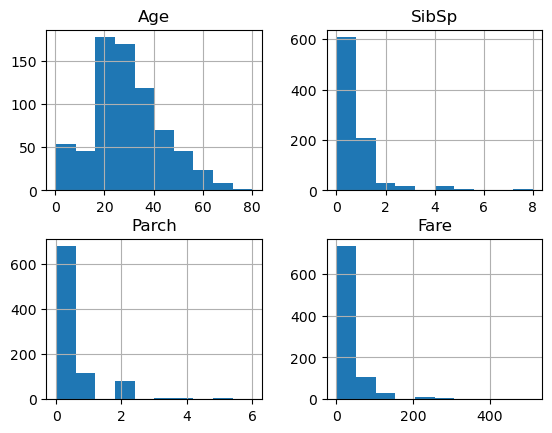

In [31]:
df.hist();

## findings of this step:
- we have possible outliers in the age and fare columns.
- for the fare the outliers is found in both the positive and negative.(skewness).
- most of the people died.
- most of the passengers were male.
- most of the passengers embarked from S.

###  univariante : discribe the distribution of each of column:
-- numerical data: hist plot

#### Let's find the most range of the age of the passenger.

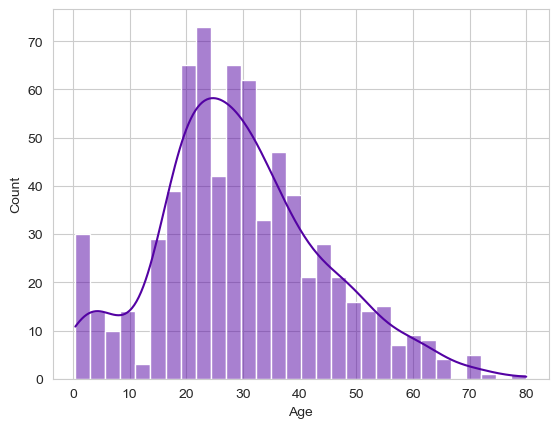

In [32]:
sns.set_style('whitegrid')
sns.set_palette('plasma')
sns.histplot(data=df,x="Age",bins=30,kde=True);

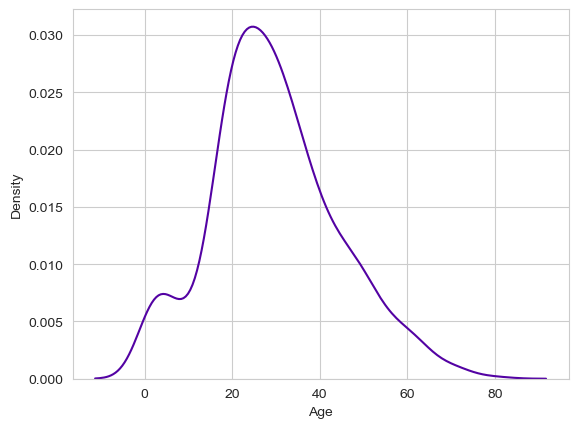

In [38]:
sns.kdeplot(data=df,x="Age");

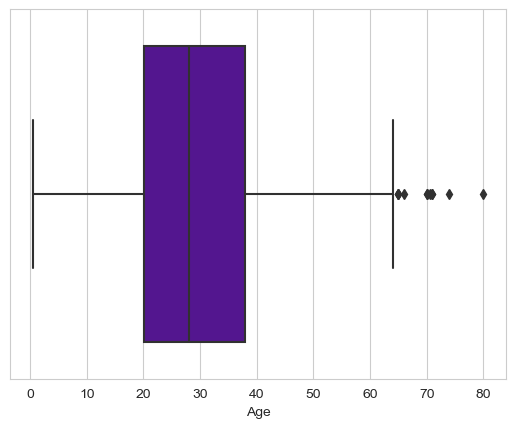

In [37]:
sns.boxplot(data=df,x="Age",whis=1.5);

as we see above the most range of age is from 15 to 40

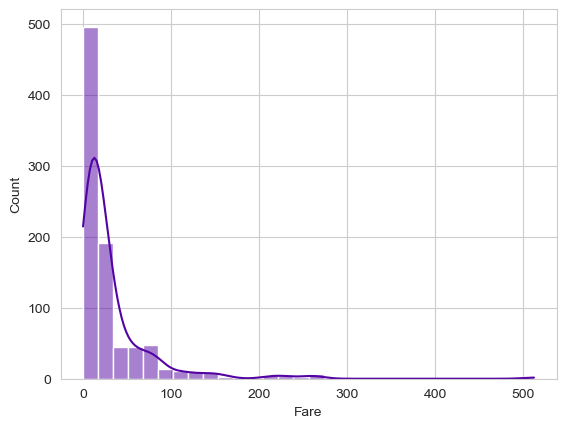

In [44]:
sns.histplot(data=df,x='Fare',bins=30,kde=True);

Let's explore the Fare without the outlayer

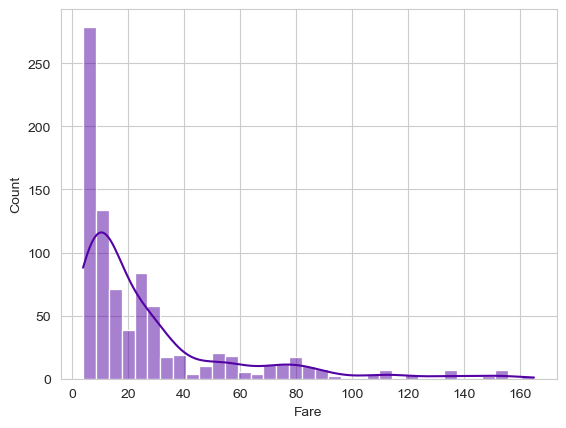

In [47]:
condition=(df['Fare']>0)&(df['Fare']<=200)
temp=df[condition]
sns.histplot(data=temp,x='Fare',kde=True);

as we see apove many of the passenger didn't pay fare i think they maybe the team of the shipe or visitors with free tickets

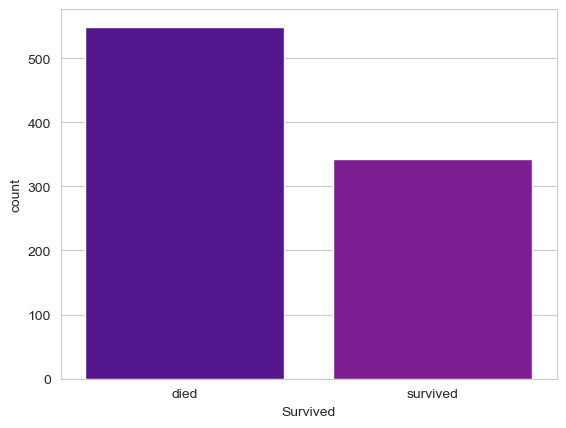

In [49]:
sns.countplot(data=df,x='Survived');

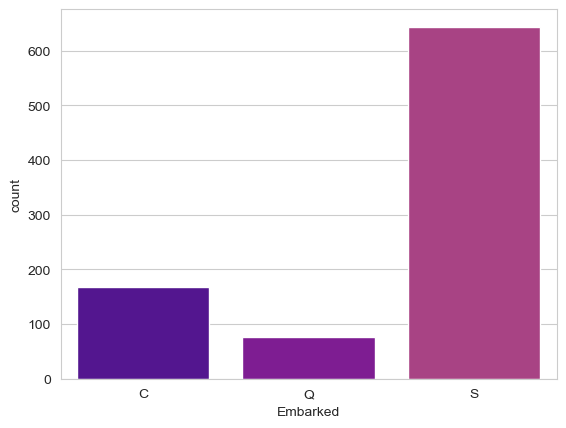

In [53]:
sns.countplot(data=df,x='Embarked');

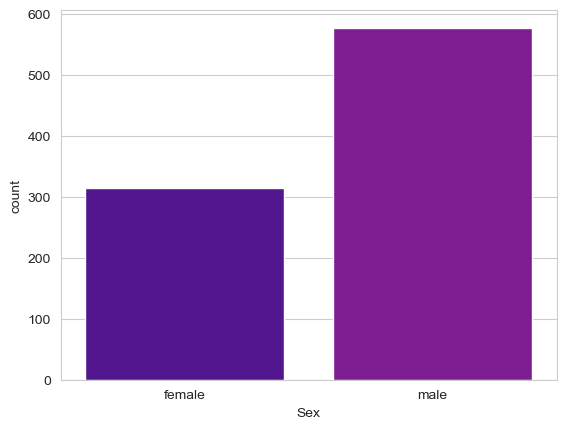

In [65]:
sns.countplot(data=df, x='Sex');

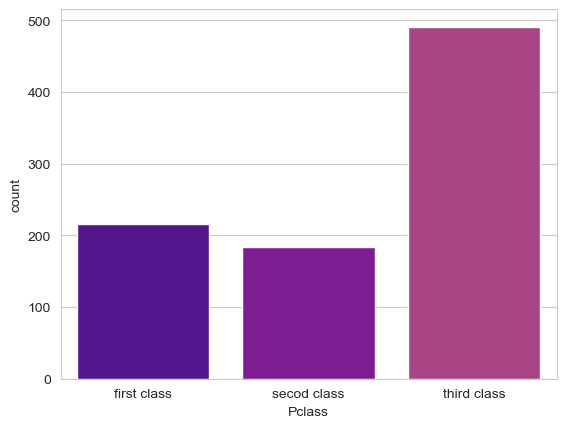

In [56]:
sns.countplot(data=df,x='Pclass');

above diagrams showed that most of the passenger died
-- most of them males 
 --most of them was in third class

# bivariante analysis:

In [69]:
df.groupby('Survived')['Sex'].count()

Survived
died        549
survived    342
Name: Sex, dtype: int64

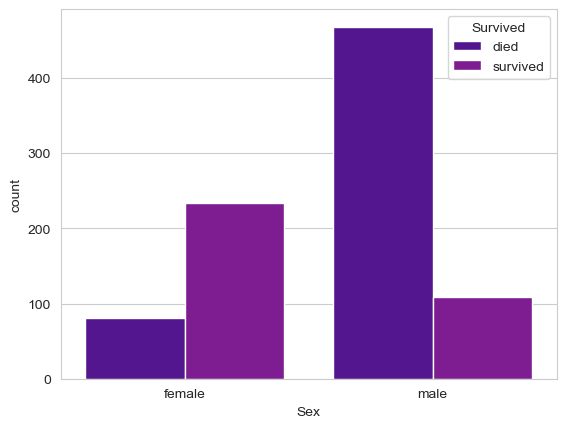

In [73]:
sns.countplot(x='Sex',data=df,hue='Survived');

 In the diagram presented above the number of survived in females are bigger than in males 

## what about the children.

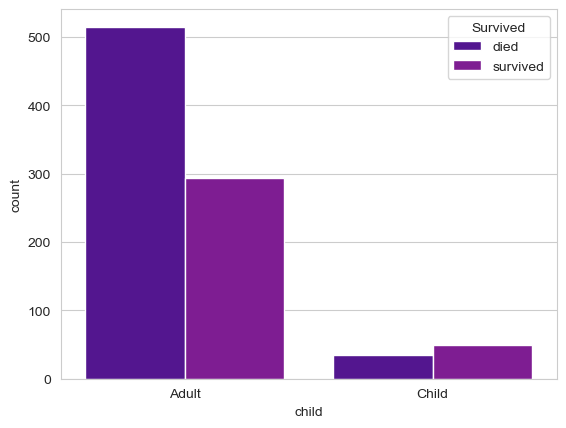

In [75]:
def child_or_not(number):
    if number <=15:
        return 'Child'
    else:
        return 'Adult'
df['child']=df['Age'].apply(child_or_not)
sns.countplot(x='child',data=df,hue='Survived');

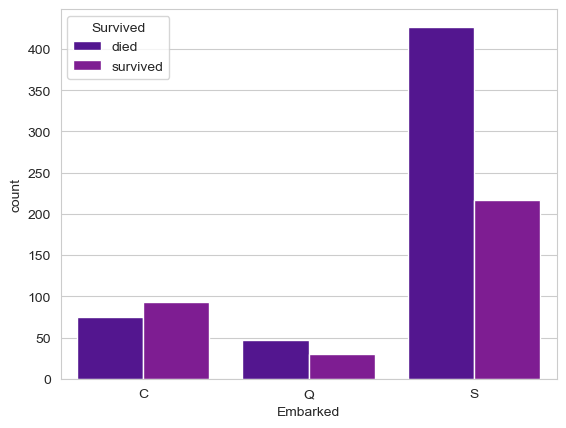

In [77]:
sns.countplot(x='Embarked',data=df,hue='Survived');

 In the diagram presented above the number of survived in eache Embarked

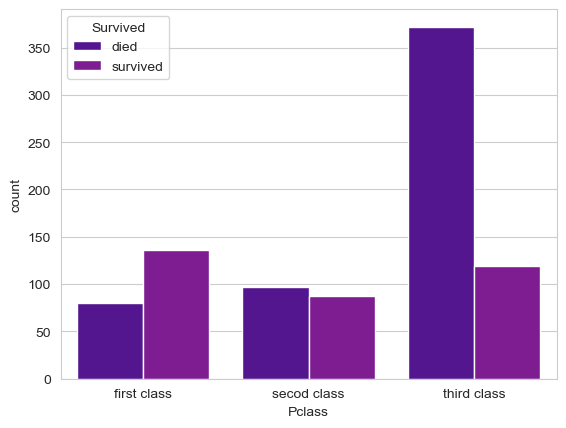

In [81]:
sns.countplot(x='Pclass',data=df,hue='Survived');

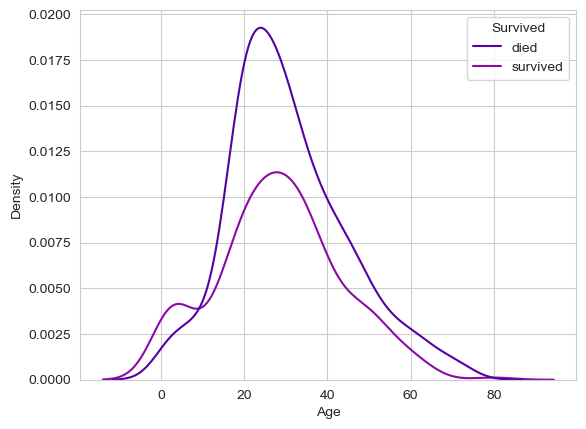

In [83]:
sns.kdeplot(x='Age',data=df,hue='Survived');

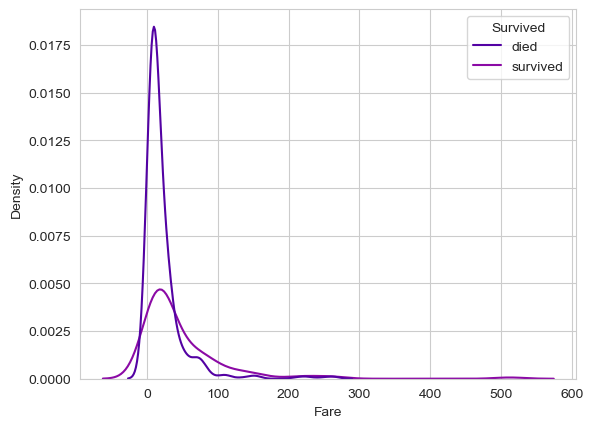

In [85]:
sns.kdeplot(x='Fare',data=df,hue='Survived');

###### In the diagram presented above the number of survived & the paid fare and showed that the number of survived from those who paid more fare increased than the others 

C:\Users\Omar_Abdelhamid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


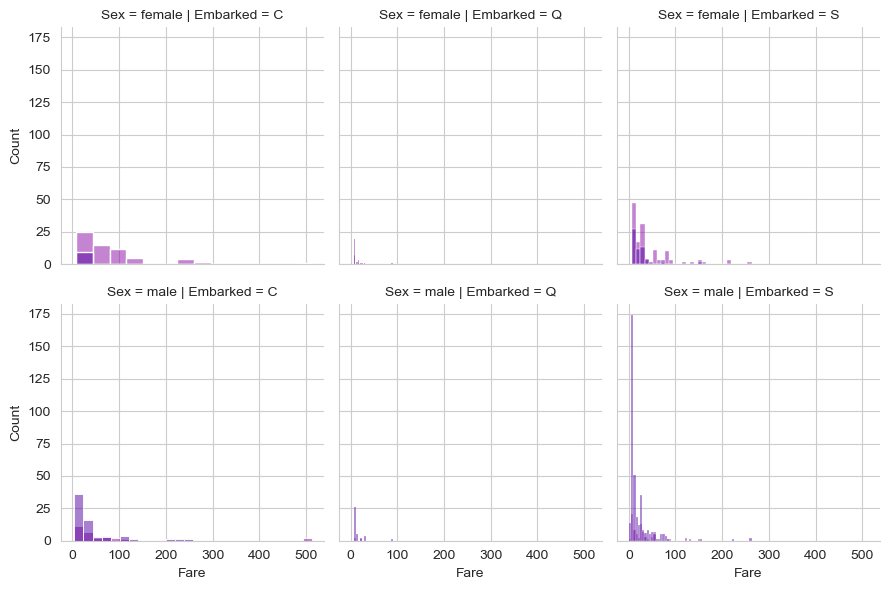

In [89]:
g=sns.FacetGrid(df,row='Sex',col='Embarked')
g.map_dataframe(sns.histplot,x='Fare',hue='Survived');

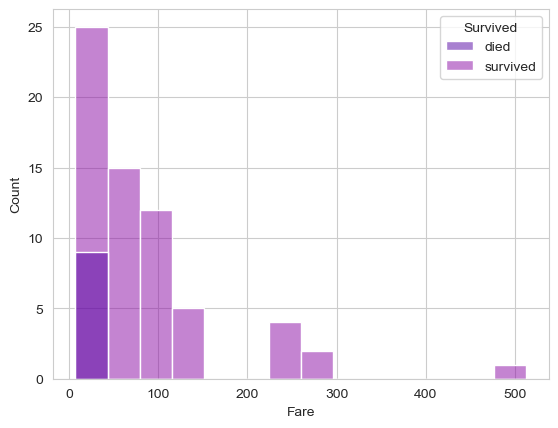

In [87]:
condition=df['Embarked']=='C'
condition2=df['Sex']=='female'
tmp=df[condition& condition2]
sns.histplot(x='Fare',data=tmp,hue='Survived');

# conclusion

in the above diagrams, I tried to explore and find some interesting insights from the data and I found the following 
 - most of the dead passengers the adult males 
    - the most of died passengers from age 18 to 30 
    - and also who's paid higher fare survived than the others
    